In [1]:
!pip install matplotlib deap

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.1 MB 544.7 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.1 MB 1.0 MB/s eta 0:00:01
     ------------- -------------------------- 0.4/1.1 MB 1.9 MB/s eta 0:00:01
     ------------------------ --------------- 0.7/1.1 MB 2.7 MB/s eta 0:00:01
     -------------------------- ------------- 0.7/1.1 MB 2.8 MB/s eta 0:00:01
     -------------------------------------- - 1.0/1.1 MB 3.3 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 2.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requireme

gen	nevals	avg    	min    
0  	300   	557.095	4.54895
1  	213   	542.27 	6.64153
2  	243   	535.951	7.002  
3  	232   	525.912	4.51873
4  	233   	522.13 	2.48312
5  	218   	515.659	2.48312
6  	213   	517.771	1.10415
7  	233   	516.159	5.06529
8  	219   	508.53 	1.34473
9  	209   	497.431	5.45848
10 	224   	496.935	4.11962
11 	230   	496.849	7.19139
12 	230   	496.818	3.6241 
13 	217   	490.902	5.86651
14 	231   	489.345	4.76499
15 	250   	481.91 	3.7758 
16 	238   	484.302	3.80361
17 	236   	479.308	4.37584
18 	225   	480.468	1.6614 
19 	225   	473.216	0.29738
20 	209   	463.245	1.14516
21 	232   	462.858	1.14516
22 	237   	455.958	2.08399
23 	217   	451.165	2.61668
24 	227   	444.535	0.88359
25 	246   	443.06 	3.79719
26 	233   	428.906	3.79719
27 	219   	413.004	3.79719
28 	229   	392.278	2.71847
29 	223   	382.103	5.87593
30 	238   	372.584	1.87944
31 	225   	363.581	6.72867
32 	221   	361.357	2.30664
33 	243   	359.297	3.59437
34 	232   	351.866	2.31469
35 	244   	352.823	2.31469
3

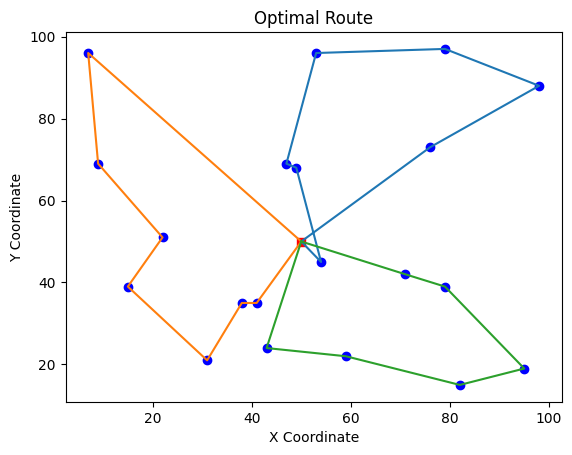

In [2]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Task 1 - Define the number of locations and vehicles
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

# Task 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
